# **2D Rastrigin function**
A non-convex function used as a performance test problem for optimization algorithms.

In [ ]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

epochs = 100

def rastrigrin(x):
  n = x.size(dim=0)
  A = torch.tensor(1, requires_grad = True, dtype=float)
  return (A * n) + torch.sum(torch.pow(x, 2) - A * torch.cos(2 * np.pi * x))

In [ ]:
#x = torch.tensor([1.0, 1.0])
#print(rastrigrin(x))

def optimise(opt, loss):
  loss = np.empty(0)
  for i in range(epochs):
    opt.zero_grad()
    output = rastrigrin(p)
    output.backward()
    opt.step()
    loss = np.append(loss, [output.data])
  return loss


In [ ]:
p = torch.tensor([5.0, 5.0], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum=0.9)
loss_mom = optimise(opt, np.empty(0))
print("Function value: " + str(loss_mom[-1]))

Function value: 1.9028429985046387


In [ ]:
p = torch.tensor([5.0, 5.0], requires_grad=True)
opt = optim.SGD([p], lr=0.01)
loss_sgd = optimise(opt, np.empty(0))
print("Function value: " + str(loss_sgd[-1]))

Function value: 17.053133010864258


In [ ]:
p = torch.tensor([5.0, 5.0], requires_grad=True)
opt = optim.Adam([p], lr=0.01)
loss_adam = optimise(opt, np.empty(0))
print("Function value: " + str(loss_adam[-1]))

Function value: 31.296653747558594


In [ ]:
p = torch.tensor([5.0, 5.0], requires_grad=True)
opt = optim.Adagrad([p], lr=0.01)
loss_agrad = optimise(opt, np.empty(0))
print("Function value: " + str(loss_agrad[-1]))

Function value: 47.806068420410156


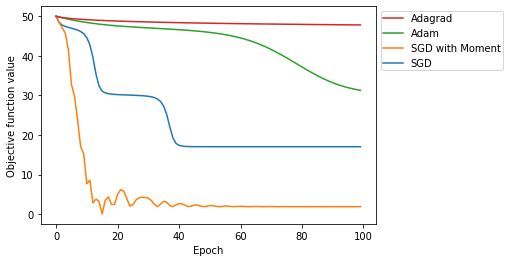

In [ ]:
ax = plt.subplot(1,1,1)
p1, = ax.plot(loss_sgd, label="SGD")
p2, = ax.plot(loss_mom, label="SGD with Moment")
p3, = ax.plot(loss_adam, label="Adam")
p4, = ax.plot(loss_agrad, label="Adagrad")

plt.xlabel("Epoch")
plt.ylabel("Objective function value")

handles, labels = ax.get_legend_handles_labels()

# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.0, 1.0), borderpad=0.2)
#plt.savefig('loss_plot')

# **Soft-margin SVM**

In [ ]:
import torch
import pandas as pd
import torch.optim as optim
from torch.utils import data

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
+'iris/iris.data', header=None)

df = df.sample(frac=1, random_state=0) #shuffle

df = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])] #filter

In [ ]:
#add label indices column
mapping = {k: v for v, k in enumerate(df[4].unique())}
df[5] = (2 * df[4].map(mapping)) - 1 #labels in {−1 ,1}

In [ ]:
#normalise data
alldata = torch.tensor(df.iloc[:,[0, 1, 2, 3]].values, dtype=torch.float)
alldata = (alldata - alldata.mean(dim=0)) / alldata.var(dim=0)

In [ ]:
#create datasets
targets_tr = torch.tensor(df.iloc[:75, 5].values, dtype=torch.long)
targets_va = torch.tensor(df.iloc[75:, 5].values, dtype=torch.long)
data_tr = alldata[:75]
data_va = alldata[75:]

In [ ]:
dataset = data.TensorDataset(data_tr, targets_tr)
dataloader = data.DataLoader(dataset, batch_size=25)

In [ ]:
def hinge_loss(y_pred, y_true):
  n = y_pred.shape[0]
  zeros = torch.zeros(n)
  return torch.sum(torch.maximum(zeros, 1 - y_pred*y_true)) / n

In [ ]:
def svm(x, w, b):
  h = (w*x).sum(1) + b
  return h

In [ ]:
def accuracy(y_pred, target):
  acc = torch.sum(torch.sign(y_pred) == torch.sign(target))
  return acc/y_pred.size(dim=0)

# SGD

In [ ]:
sgd_acc = torch.zeros(20)
for j in range(20):
  w = torch.randn(1, 4, requires_grad=True)
  b = torch.randn(1, requires_grad=True)

  opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)

  for epoch in range(100):
    for features, labels in dataloader:
      opt.zero_grad()
      output = hinge_loss(svm(features, w, b), labels)
      output.backward()
      opt.step()

  y_pred = svm(data_va, w, b)
  print("Validation accuracy: ", accuracy(y_pred, targets_va).item())
  sgd_acc[j] = accuracy(y_pred, targets_va).item()

print(sgd_acc.sum(0) / 20)

Validation accuracy:  0.9200000166893005
Validation accuracy:  0.8399999737739563
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.9200000166893005
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.9599999785423279
Validation accuracy:  0.9200000166893005
Validation accuracy:  1.0
Validation accuracy:  0.9599999785423279
Validation accuracy:  0.8399999737739563
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.9599999785423279
Validation accuracy:  0.9200000166893005
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.9200000166893005
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.9599999785423279
Validation accuracy:  0.9200000166893005
Validation accuracy:  0.9599999785423279
tensor(0.9140)


# Adam

In [ ]:
adam_acc = torch.zeros(20)
for j in range(20):
  w = torch.randn(1, 4, requires_grad=True)
  b = torch.randn(1, requires_grad=True)

  opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)

  for epoch in range(100):
    for features, labels in dataloader:
      opt.zero_grad()
      output = hinge_loss(svm(features, w, b), labels)
      output.backward()
      opt.step()

  y_pred = svm(data_va, w, b)
  print("Validation accuracy: ", accuracy(y_pred, targets_va).item())
  adam_acc[j] = accuracy(y_pred, targets_va).item()

print(adam_acc.sum(0) / 20)

Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.9599999785423279
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.9200000166893005
Validation accuracy:  0.9200000166893005
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.9200000166893005
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  0.8799999952316284
Validation accuracy:  1.0
tensor(0.8960)


We can use the same set of weights each time we train the network; for example, you could use the values of 0.0 for all weights.

In this case, the equations of the learning algorithm would fail to make any changes to the network weights, and the model will be stuck. It is important to note that the bias weight in each neuron is set to zero by default, not a small random value.

Specifically, nodes that are side-by-side in a hidden layer connected to the same inputs must have different weights for the learning algorithm to update the weights.

This is often referred to as the need to break symmetry during training.

Perhaps the only property known with complete certainty is that the initial parameters need to “break symmetry” between different units. If two hidden units with the same activation function are connected to the same inputs, then these units must have different initial parameters. If they have the same initial parameters, then a deterministic learning algorithm applied to a deterministic cost and model will constantly update both of these units in the same way.